In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gamma

(array([1.049e+03, 4.980e+02, 2.410e+02, 1.170e+02, 5.300e+01, 2.100e+01,
        1.600e+01, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([3.57540907e-06, 2.48115073e-02, 4.96194392e-02, 7.44273710e-02,
        9.92353029e-02, 1.24043235e-01, 1.48851167e-01, 1.73659099e-01,
        1.98467030e-01, 2.23274962e-01, 2.48082894e-01]),
 <BarContainer object of 10 artists>)

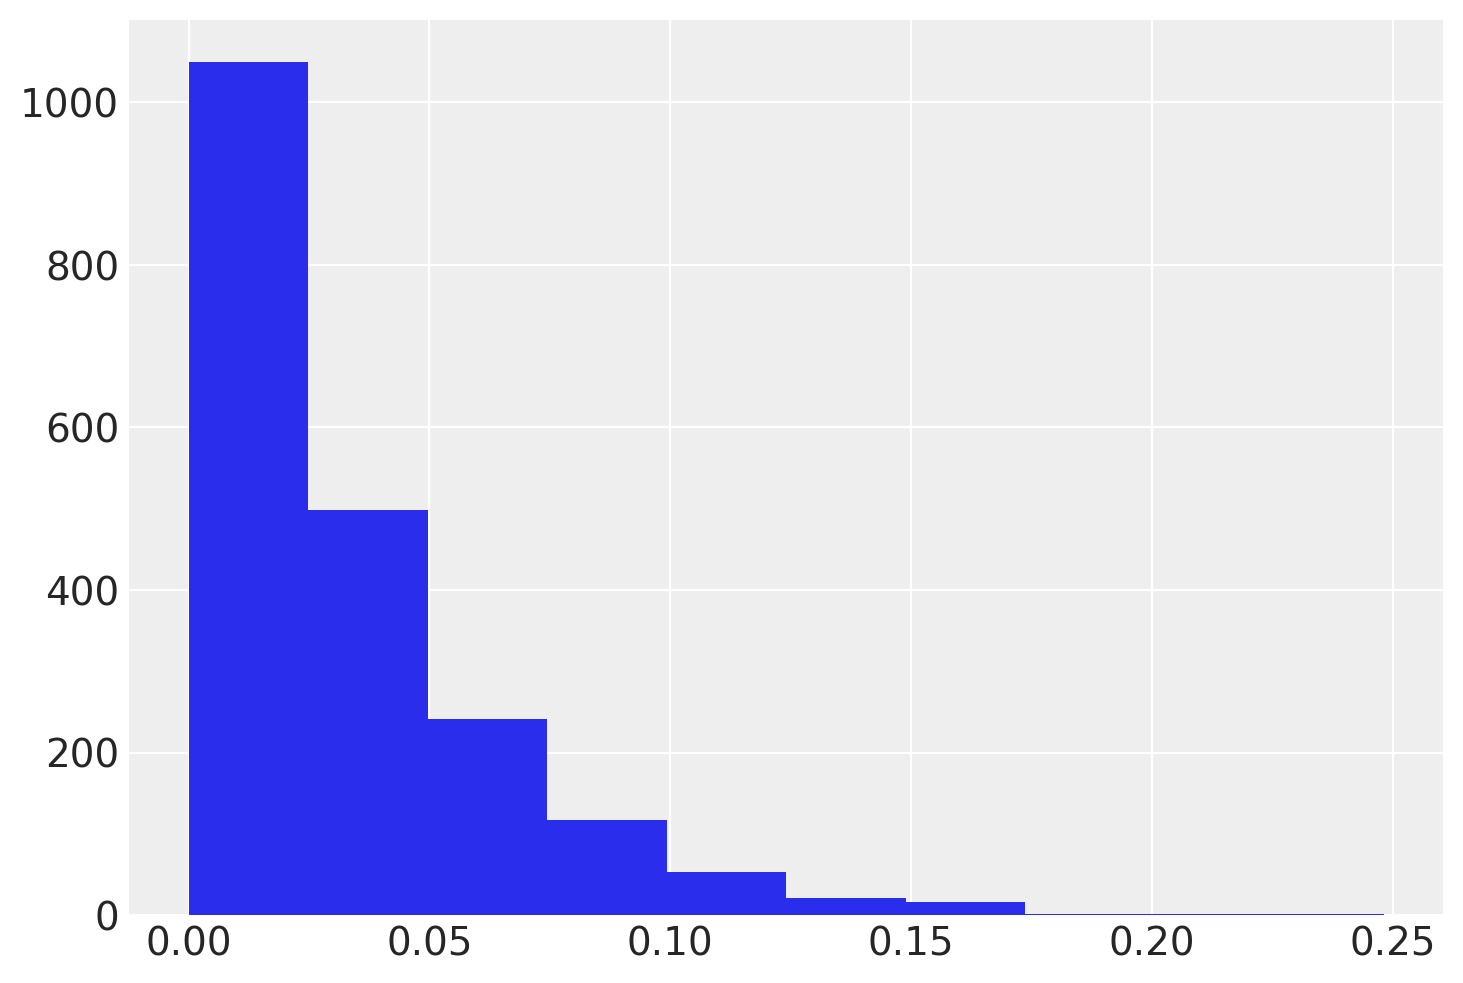

In [58]:
# simulate data from a known mixture distribution
np.random.seed(12345)  # set random seed for reproducibility

k = 1
ndata = 1000
# spread = 5
# centers = np.array([-spread, 0, spread])

# simulate data from mixture distribution

v = np.random.randint(0, k, ndata)
data_1 = np.random.gamma(shape = 1, scale = 1/30, size = ndata)
data_2 = np.random.gamma(shape = 1, scale = 1/30, size = ndata)

data = np.append(data_1, data_2)
plt.hist(data)

In [133]:
def log_mpgd_posterior_kernel(data, p, mu, eta, u, csi, sigma, a_prior, b_prior, c_prior, d_prior, mu_u, sigma_u):
    '''
    data: observed values
    p: mixture weights
    mu: mean vector from gamma mixture
    eta: shape vector from gamma mixture
    u: threshold value from extreme values represented as the GPD parameter
    csi: GPD parameter
    sigma: GPD parameter
    a_prior: prior parameter vector from IG distribution over mu
    b_prior: prior parameter vector from IG distribution over mu
    c_prior: prior parameter vector from gamma distribution over eta
    d_prior: prior parameter vector from gamma distribution over eta
    mu_u: prior mean over u
    sigma_u: prior scale over u
    '''
    data_under_u = data[data < u]
    data_over_u = data[data >= u]
    
    # gamma mixture kernel
    gm_kernel = 0
    for j in range(len(p)):
        gm_kernel += np.log(p[j] * gamma.pdf(x = data_under_u, a = eta[j], scale = eta[j] / mu[j])).sum()
        
        # cumulated
        cumulated_prob = p[j] * gamma.cdf(u, a = eta[j], scale = eta[j] / mu[j])
        
    # generalized pareto distribution kernel 
    log_cumulated_prob = len(data_over_u) * np.log(1 - cumulated_prob)
    
    gpd_kernel = (log_cumulated_prob
                - np.sum(np.log(sigma) - ((1 + csi)/csi) * np.log1p(csi * (data_over_u - u)/sigma)
                + np.sum((c_prior - 1) * np.log(eta) -  d_prior * eta  - (a_prior + 1) * np.log(mu) - b_prior/mu)
                - 0.5*((u - mu_u)/sigma_u)**2 - np.log(sigma) - np.log(1+csi)
                - 0.5 * np.log(1 + 2*csi)))
                  
    return gm_kernel + gpd_kernel

In [124]:
def metropolis_step(prop, current, posterior_kernel, proposed_kernel):
    '''
    log scaled only for both posterior kernel and proposed kernel
    
    prop: proposed value
    current: current value
    posterior_kernel: dict with posterior kernel both under prop and current value
    proposed_kernel: dict proposed kernel with both under prop and current value
    '''
    ratio = (posterior_kernel['prop'] + proposed_kernel['current'])/((posterior_kernel['current'] + proposed_kernel['prop']))
    prob = min(1, ratio)
    
    rand = np.random.random_sample(1)
    if rand < prob:
        return prop
    else:
        return current

In [131]:
def fit(n_iteration):
    pass

In [134]:
log_mpgd_posterior_kernel(data = np.array([10, 10, 10, 11]), p = np.array([10, 11]), mu = np.array([10, 11]), eta = np.array([10, 11]), u = np.array([10]), csi= np.array([10]), sigma= np.array([10]), a_prior= np.array([10]), b_prior= np.array([10]), c_prior= np.array([10]), d_prior= np.array([10]), mu_u= np.array([10]), sigma_u= np.array([10]))

0
1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log


array([nan])